# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares
       If it set further lows, buy some more
    3. If the SPY closes at a X-day high, sell some.
       If it sets further highs, sell some more, etc...
    
    (Scaling in and out)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 2

Define the margin multiple

In [6]:
margin = 2

Run Strategy

In [7]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions, stop_loss_pct=85, margin=margin)
s.run()

Retrieve log DataFrames

In [8]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [9]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
419,2020-01-27,323.50,2020-02-04,329.06,5.56,4375.72,787,249150.50,LONG,SPY
420,2020-01-31,321.73,2020-02-05,332.86,11.13,8770.42,788,257920.92,LONG,SPY
421,2020-02-21,333.48,2020-03-04,312.86,-20.62,-16557.88,803,241363.04,LONG,SPY
422,2020-02-24,322.42,2020-03-09,274.23,-48.19,-38696.57,803,202666.47,LONG,SPY
423,2020-06-24,304.09,2020-07-02,312.23,8.14,5689.87,699,208356.34,LONG,SPY


In [10]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-07-08,218356.34,218356.34,218356.34,0,218356.34,0.00,-
2020-07-09,218356.34,218356.34,218356.34,0,218356.34,0.00,-
2020-07-10,218356.34,218356.34,218356.34,0,218356.34,0.00,-
2020-07-13,218356.34,218356.34,218356.34,0,218356.34,0.00,-
2020-07-14,218356.34,218356.34,218356.34,0,218356.34,0.00,-


Generate strategy stats - display all available stats

In [11]:
pf.print_full(stats)

start                                                  1993-11-11
end                                                    2020-07-14
beginning_balance                                           10000
ending_balance                                          218356.34
total_net_profit                                        208356.34
gross_profit                                            463974.47
gross_loss                                             -255618.13
profit_factor                                                1.82
return_on_initial_capital                                 2083.56
annual_return_rate                                          12.26
trading_period                           26 years 8 months 3 days
pct_time_in_market                                          35.38
margin                                                          2
avg_leverage                                                 1.61
max_leverage                                                 2.38
min_levera

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-07-14 00:00:00 SELL 215 SPY @ 316.03


Plot Equity Curves: Strategy vs Benchmark

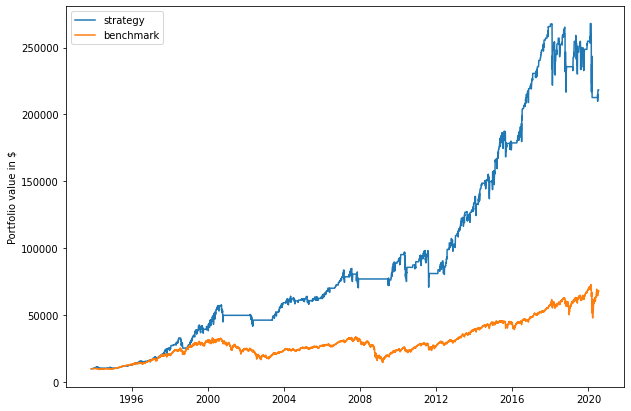

In [13]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

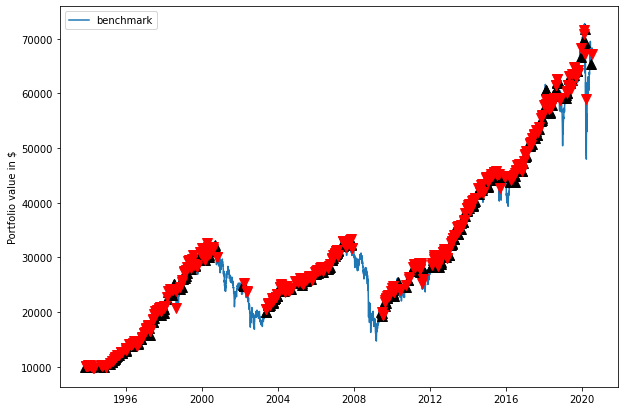

In [14]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,12.26,7.45
max_closed_out_drawdown,-27.87,-56.42
drawdown_annualized_return,-2.27,-7.57
drawdown_recovery,-0.19,-1.42
best_month,22.45,23.06
worst_month,-25.69,-31.38
sharpe_ratio,0.70,0.47
sortino_ratio,0.53,0.60
monthly_std,3.98,4.54


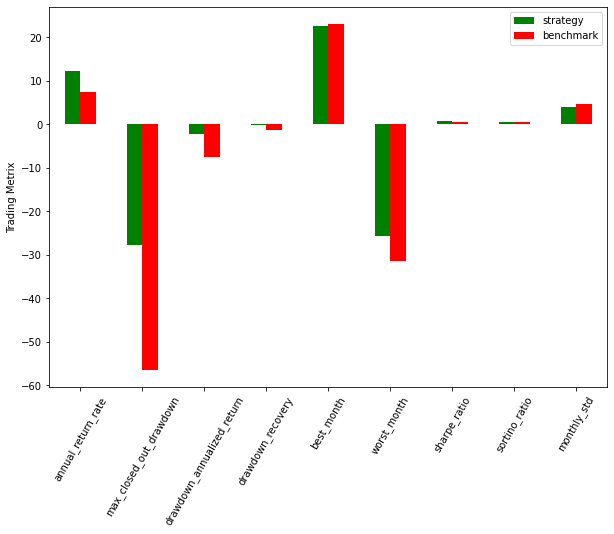

In [15]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df